# 02 Clustering 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Import

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    df = df[(df["TURNFEAR"] == 1) & (df["NETWORTH"] < 2e6)]
    return df

In [4]:
df = wrangle("../data/SCFP2019.csv.gz")
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## Explore

Calculate the variance for all the features in df

In [7]:
top_ten_var = df.var().sort_values().tail(10)
top_ten_var

PLOAN1      1.140894e+10
ACTBUS      1.251892e+10
BUS         1.256643e+10
KGTOTAL     1.346475e+10
DEBT        1.848252e+10
NHNFIN      2.254163e+10
HOUSES      2.388459e+10
NETWORTH    4.847029e+10
NFIN        5.713939e+10
ASSET       8.303967e+10
dtype: float64

In [14]:
# Calculate trimmed variance
top_ten_trim_var = df.apply(trimmed_var, limits=(0.1, 0.1)).sort_values().tail(10)
top_ten_trim_var

WAGEINC     5.550737e+08
HOMEEQ      7.338377e+08
NH_MORT     1.333125e+09
MRTHEL      1.380468e+09
PLOAN1      1.441968e+09
DEBT        3.089865e+09
NETWORTH    3.099929e+09
HOUSES      4.978660e+09
NFIN        8.456442e+09
ASSET       1.175370e+10
dtype: float64

## Split

In [16]:
high_var_cols = top_ten_trim_var.index.tolist()
X = df[high_var_cols]
X.head()

,WAGEINC,HOMEEQ,NH_MORT,MRTHEL,PLOAN1,DEBT,NETWORTH,HOUSES,NFIN,ASSET
5,11199.296917,0.0,0,0.0,0.0,12200.0,-6710.0,0.0,3900.0,5490.0
6,11199.296917,0.0,0,0.0,0.0,12600.0,-4710.0,0.0,6300.0,7890.0
7,11199.296917,0.0,0,0.0,0.0,15300.0,-8115.0,0.0,5600.0,7185.0
8,12217.414819,0.0,0,0.0,0.0,14100.0,-2510.0,0.0,10000.0,11590.0
9,12217.414819,0.0,0,0.0,0.0,15400.0,-5715.0,0.0,8100.0,9685.0


## Build Model

In [17]:
X_summary = X.aggregate(["mean", "std"]).astype(int)
X_summary

,WAGEINC,HOMEEQ,NH_MORT,MRTHEL,PLOAN1,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,37782,34529,38580,40001,42153,72701,76387,74530,117330,149089
std,42201,83690,91696,95701,106812,135950,220159,154546,239038,288166


In [18]:
n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []

for i in n_clusters:
    model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=i, random_state=42)
    )
    model.fit(X)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(X, model.named_steps["kmeans"].labels_))

Text(0.5, 1.0, 'Inertia Errors by Number of Clusters')

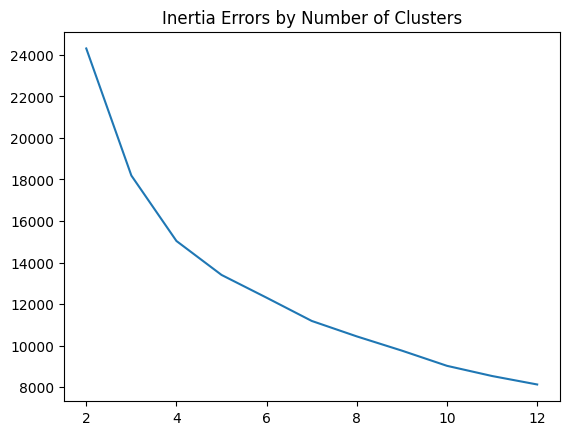

In [21]:
plt.plot(n_clusters, inertia_errors)
plt.title("Inertia Errors by Number of Clusters")

Text(0.5, 1.0, 'Silhouette Scores by Number of Clusters')

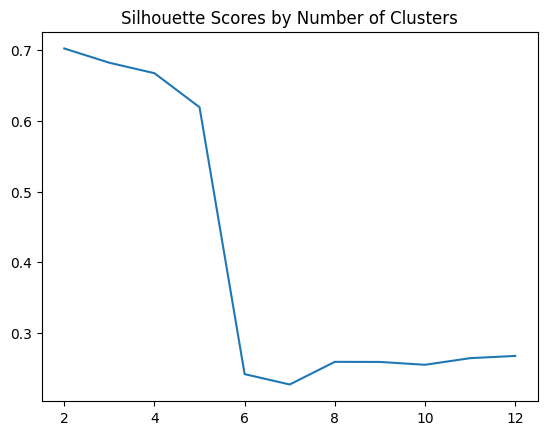

In [22]:
plt.plot(n_clusters, silhouette_scores)
plt.title("Silhouette Scores by Number of Clusters")

In [23]:
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, random_state=42)
)

# Fit model to data
final_model.fit(X)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('kmeans', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. Th

## Comunicate

In [ ]:
labels = final_model.named_steps["kmeans"].labels_
xgb = X.groupby(labels).mean()

,WAGEINC,HOMEEQ,NH_MORT,MRTHEL,PLOAN1,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,71005.905323,79426.621160,189296.928328,193085.324232,194790.102389,250458.233788,125358.716724,272511.945392,3.223371e+05,3.758170e+05
1,31388.683795,10466.704194,4369.237264,4398.789755,5623.028427,29219.707290,19201.108922,14865.493949,3.368605e+04,4.842082e+04
2,87601.158602,302704.225352,472718.309859,511028.169014,588802.816901,714771.549296,719177.323944,813732.394366,1.232127e+06,1.433949e+06
3,36401.141339,227524.038462,50158.653846,56096.153846,49533.653846,95477.091346,695854.927885,283620.192308,5.880275e+05,7.913320e+05


### PCA

In [25]:
pca = PCA(n_components=2, random_state=42)
# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.DataFrame'>
X_pca shape: (4418, 2)


,PC1,PC2
0,-235717.371562,17317.312683
1,-232173.397637,18670.112395
2,-233751.980770,15191.440499
3,-226853.981008,19744.123605
4,-229974.551483,16901.311239


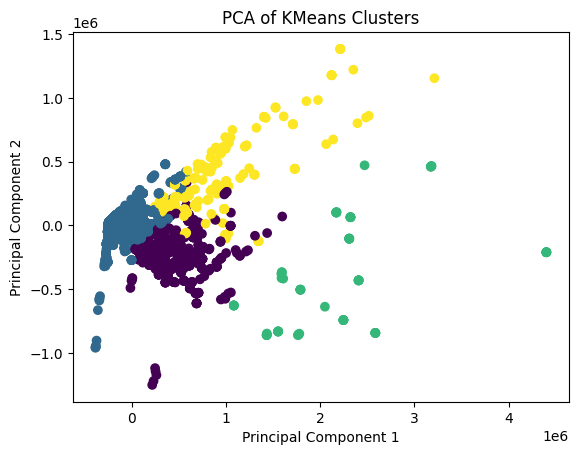

In [27]:
plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
plt.title("PCA of KMeans Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2");